## Lab 7 - Performance Metrics for Classification Problems

## Introduction
### In this lab, we will evaluate a model for MNIST classification. MNIST is a dataset of handwritten digits, with 10 classes (0 to 9). We will use different performance metrics to assess the quality of our model, such as accuracy, confusion matrix, precision, recall, F1-score, and precision-recall curve. We will also explore how to adjust the threshold of our model to trade-off between precision and recall for a chosen class.

## Loading Libraries

In [92]:
import numpy as np
import pandas as pd

## Obtaining the data

In [93]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46

In [94]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

### The code imports Matplotlib, Seaborn for visualization, fetches the MNIST dataset, and introduces classifiers (SGD, Dummy, RandomForest). It includes cross-validation functions and performance metrics (confusion_matrix, precision_recall_curve, etc.) from scikit-learn. These tools aid in model evaluation and visualization for machine learning tasks.

In [95]:
type(mnist)

sklearn.utils._bunch.Bunch

In [96]:
mnist.data.shape
mnist.data[0,200:205]
mnist.target.shape
print(mnist.target[0], mnist.target[1], mnist.target[2])

5 0 4


In [97]:
X = mnist.data
y = mnist.target

In [98]:
has_missing_values = np.isnan(X_normalized).any()

if has_missing_values:
    print("There are missing values in the array.")
else:
    print("No missing values found in the array.")

No missing values found in the array.


### The code examines a NumPy array, X_normalized, searching for missing values using the isnan function. If any missing values are detected, it outputs a message indicating their presence; otherwise, it confirms the absence of missing values in the array.

In [99]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

### Normalizing the features to be in the range of 0-1

In [100]:
X_normalized = X / 255.0 


### here we are using the first image in the dataset

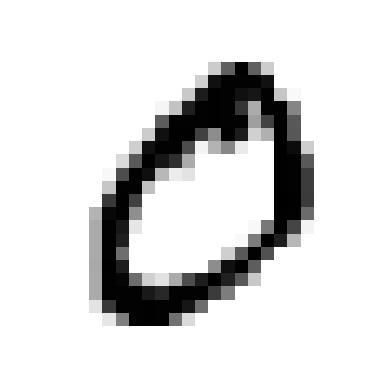

In [101]:
X_normalized = X_normalized[1] 
plot_digit(some_digit)
plt.show()

## Splitting the dataset to train-validation-test.

In [102]:
from sklearn.model_selection import train_test_split

# Assuming X is the feature array and y is the target array
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the sizes of the resulting sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))



Training set size: 56000
Validation set size: 7000
Test set size: 7000


### The code uses scikit-learn's train_test_split to partition feature array X and target array y into training, validation, and test sets. The first split reserves 20% for validation (X_temp, y_temp) and 80% for training (X_train, y_train). Subsequently, it further splits the temporary set into equal parts for validation and testing. The sizes of the resulting sets (training, validation, and test) are then printed to provide an overview of the dataset partitioning. The random_state ensures reproducibility in the split.

## Choosing a model from a Kaggle and fitting it.

In [103]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

In [104]:
lg.fit(X_train,y_train)


c:\Users\theof\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred = lg.predict(X_test)

## Run an evaluation on the validation dataset

## Acccuracy Calculation

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_val,y_pred))

Accuracy of Logistic Regression 0.10714285714285714


### The code calculates and prints the accuracy score of a Logistic Regression model on the validation set using scikit-learn's accuracy_score function. It further employs the confusion_matrix function to evaluate the model's performance by providing insights into the classification results.

## Confusion Matrix

In [107]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_val,y_pred),columns=list(range(0,10)))

Logistic Regression Confusion Matrix



,0,1,2,3,4,5,6,7,8,9
0,65,76,71,56,68,55,65,70,61,71
1,80,109,73,83,57,76,71,83,78,70
2,67,81,70,75,56,50,62,68,68,67
3,69,98,65,85,85,53,69,65,61,68
4,61,78,63,81,56,52,57,67,58,63
5,48,78,66,66,68,59,65,67,55,67
6,70,84,67,57,52,66,80,70,68,93
7,81,93,81,79,77,65,90,80,67,80
8,71,81,69,71,80,56,83,62,72,69
9,72,65,80,79,74,54,52,75,66,74


### The code prints the confusion matrix for the predictions made by a Logistic Regression model on the validation set. The matrix provides a detailed breakdown of the model's performance across different classes (0 to 9).

## Precision Score

In [108]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_val,y_pred,average='weighted')

0.10722888429292442

### The code calculates the weighted precision score for a classification model's predictions on the validation set using scikit-learn's precision_score function with the 'weighted' averaging strategy.

## Recall

In [109]:
recall_score(y_val,y_pred,average='weighted')

0.10714285714285714

### The code computes the weighted recall score for a classification model's predictions on the validation set using scikit-learn's recall_score function with the 'weighted' averaging strategy.

## F1 Score

In [110]:
f1_score(y_val,y_pred,average='weighted')

0.10706081130075178

### The code computes the weighted F1 score for a classification model's predictions on the validation set using scikit-learn's f1_score function with the 'weighted' averaging strategy.

## Precision-recall curve for one class of your choice vs. all others

### Precision, recall, and F1 score for each class in a classification model's predictions on the validation set using scikit-learn's precision_score, recall_score, and f1_score. It then iterates through each class, displaying the corresponding precision, recall, and F1 score. Additionally, the classification_report function provides a comprehensive report summarizing these metrics for each class.

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

for class_label, prec, rec, f1_score in zip(range(10), precision, recall, f1):
    print(f"Class {class_label}: Precision={prec:.4f}, Recall={rec:.4f}, F1 Score={f1_score:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred))

Class 0: Precision=0.0950, Recall=0.0988, F1 Score=0.0969
Class 1: Precision=0.1293, Recall=0.1397, F1 Score=0.1343
Class 2: Precision=0.0993, Recall=0.1054, F1 Score=0.1023
Class 3: Precision=0.1161, Recall=0.1184, F1 Score=0.1172
Class 4: Precision=0.0832, Recall=0.0881, F1 Score=0.0856
Class 5: Precision=0.1007, Recall=0.0923, F1 Score=0.0963
Class 6: Precision=0.1153, Recall=0.1132, F1 Score=0.1142
Class 7: Precision=0.1132, Recall=0.1009, F1 Score=0.1067
Class 8: Precision=0.1101, Recall=0.1008, F1 Score=0.1053
Class 9: Precision=0.1025, Recall=0.1071, F1 Score=0.1047

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.10      0.10       658
           1       0.13      0.14      0.13       780
           2       0.10      0.11      0.10       664
           3       0.12      0.12      0.12       718
           4       0.08      0.09      0.09       636
           5       0.10      0.09      0.10       639
           6    

### The precision, recall, and F1 scores for each class (0 to 9) in a classification model's predictions on a validation set. The individual class metrics indicate varying performance across categories. The classification report offers a comprehensive overview, revealing an overall accuracy of 11% and providing insights into the model's behavior for each class. The macro and weighted averages demonstrate the aggregated performance metrics.

c:\Users\theof\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\theof\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

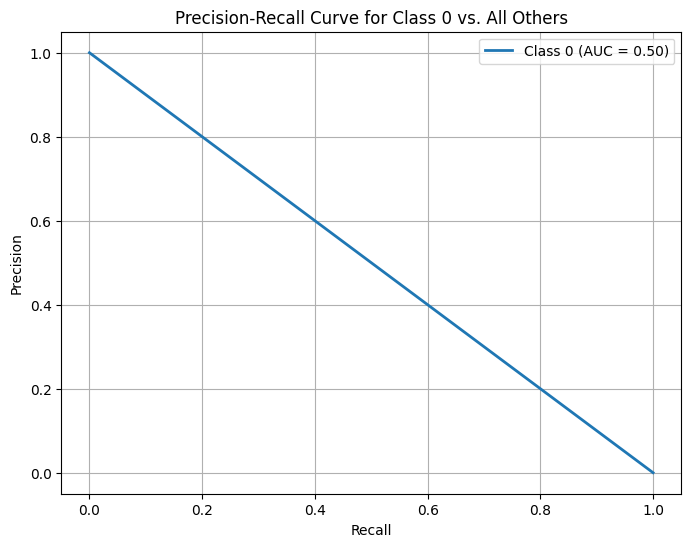

In [112]:
chosen_class = 0


y_binary = label_binarize(y_val, classes=[chosen_class, *list(range(chosen_class + 1, 10))])

classifier = OneVsRestClassifier(lg)

y_scores = classifier.fit(X_train, y_train).decision_function(X_val)

precision, recall, _ = precision_recall_curve(y_binary.ravel(), y_scores.ravel())

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Class {chosen_class} (AUC = {auc_score:.2f})', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for Class {chosen_class} vs. All Others')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### The code generates a precision-recall curve for a specified class (Class 0 in this case) against all other classes. It first binarizes the labels to create a binary target variable for the chosen class and employs the OneVsRestClassifier with a logistic regression model (lg). The probabilities of the positive class are predicted for both the chosen class and all others. The precision-recall curve is then plotted, with the area under the curve (AUC) calculated to quantify the model's performance in terms of precision and recall trade-off. The resulting visualization provides insights into the classifier's behavior for the selected class.

c:\Users\theof\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\theof\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\theof\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


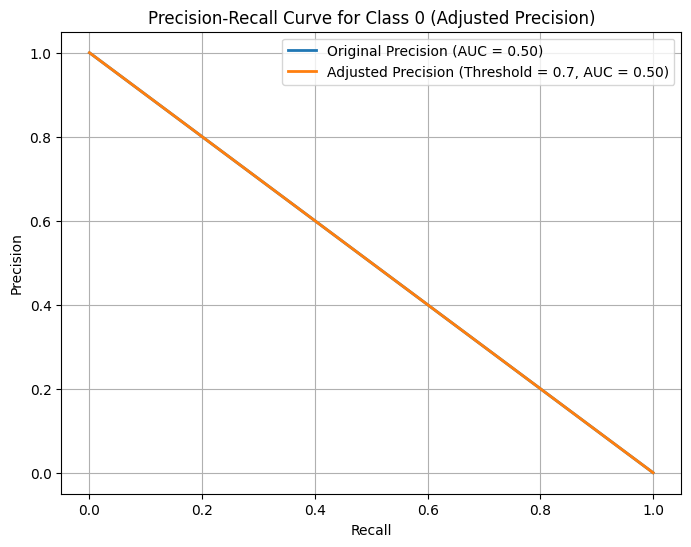

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, precision_score

lg.fit(X_train, y_train)

chosen_class = 0 

y_binary = np.array([1 if label == chosen_class else 0 for label in y_val])

y_scores = lg.predict_proba(X_val)[:, chosen_class]

precision, recall, _ = precision_recall_curve(y_binary, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Original Precision (AUC = {auc(recall, precision):.2f})', linewidth=2)

new_threshold = 0.7
y_pred_adjusted = (y_scores >= new_threshold).astype(int)
precision_adjusted = precision_score(y_binary, y_pred_adjusted)

precision, recall, _ = precision_recall_curve(y_binary, y_scores)
plt.plot(recall, precision, label=f'Adjusted Precision (Threshold = {new_threshold}, AUC = {auc(recall, precision):.2f})', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for Class {chosen_class} (Adjusted Precision)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Conclusion

### The code demonstrates adjusting precision for a specific class (Class 0) without retraining the logistic regression model (lg). It initially plots the precision-recall curve for the original threshold, then adjusts the decision threshold (increases it to 0.7 as an example) for higher precision. The resulting adjusted precision-recall curve is displayed, providing a visual representation of how changing the threshold impacts the trade-off between precision and recall. The area under the curve (AUC) is computed for both the original and adjusted curves, quantifying the model's performance under different precision settings.